# Einstein Python 2020 - Day 5 - Homework

__In this Notebook, you will PLOT some of weather data from the weather station at NYC Central Park.__

This is heavily based on the previous homework. I'll just put minimal code at the beginning to load and organize the data. It would be best for you, actually, to continue working in the last homework's notebook with your own variables.

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Your tasks</p>

Your tasks are, once again, clearly highlighted.

__Execute the imports-cell once:__

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## Load data

Let's start by loading the data. You should have downloaded the file `weather.npz` from the [Einstein Python 2020 mini website](https://python.tyto.xyz/) in the Homework section of Day 4. Place this file in the same directory as this Notebook.

I have condensed all the work until you have your well pre-processed weather data. When you work based on your own Day4-Notebook, make sure you have these five variables:

*   `date`
*   `tmin`
*   `tmax`
*   `prcp`
*   `tavg` (derived from `tmax` and `tmin`)

All five arrays should be of equal length and contain the data from `1870-01-01` to `2019-31-12`.

In [ ]:
# Open the data file
weather_data = np.load('weather.npz')
# Which variable are included?
print("Files within the weather.npz archive:")

consistent_start = np.searchsorted(weather_data['DATE'], np.datetime64('1870'))
consistent_stop = np.searchsorted(weather_data['DATE'], np.datetime64('2020'))
date = weather_data['DATE'][consistent_start:consistent_stop]
tmin = weather_data['TMIN'][consistent_start:consistent_stop]
tmax = weather_data['TMAX'][consistent_start:consistent_stop]
prcp = weather_data['PRCP'][consistent_start:consistent_stop]
tavg = (tmax + tmin) / 2

In [ ]:
if (date.size == 54786):
    print("Your date array has the correct size.")
else:
    print("Something went wrong. Your date array should have 54786 elements, bus it has: {date.size}")
# And we compare the others to date:
print("date.size == tmin.size :", date.size == tmin.size)
print("date.size == tmin.size :", date.size == tmax.size)
print("date.size == tmin.size :", date.size == prcp.size)

# Line plots

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 1</p>

Luckily, matplotlib and the `np.datetime64` datatype work nicely together. Just try it out by plotting the average temperature across the entire 150 years. Use `date` for the abscissa<sup>[1][]</sup> (x-axis) and `tavg` for the ordinate (y-axis).

[1]: https://en.wikipedia.org/wiki/Abscissa_and_ordinate

Also define a title and label the x- and y-axis!

It should look something like this:

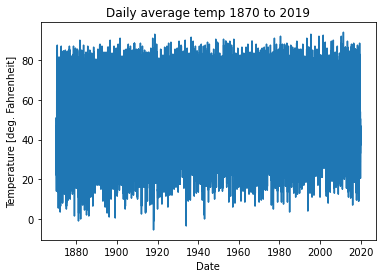

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 2</p>

The previous plot has a too many values. Let's try your birthyear for a change... you know how that works!

You can use the `axvline()`-function to show your birthday in that plot, too!

And this time, let's set the limits of the x-axis correctly, so there is no "gap" left and right of the curve...

For the year Albert Einstein was born in, that would look like this:

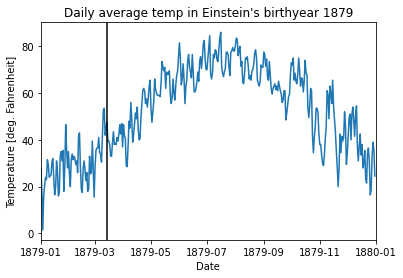

Admittedly, I chose January 1st of the next year as right x-limit. Otherwise, the dates/tick labels on the x-axis overlap - and I didn't want to deal with that right now.

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 2b</p>

Let's also try to highlight the hottest and coldest day (based on `tavg`) with a dot marker. You can copy&paste your previous code here or just add some lines in the previous cell.

__Tip:__ This is mainly a task about indexing into a limited range of your entire `date` and `tavg` arrays.

The steps are roughly as follows:

1.  Get the range of this year (start&stop indexes for example)
2.  Find the _index_ of the day with the highest/lowest temperature - `np.argmax()` and `np.argmin()` are your friends.
3.  Use this index to get the `date` and `tavg` of this years hottest/coldest day.
4.  Plot a single datapoint (e.g. marker='o') at the date|tavg coordinate of that day.

Note: This _index_ in 2. will likely be _within_ this year (Jan 1st would be index 0). There are two ways to deal with that:

*   Make shorter arrays `date_year` and `tavg_year` that only contain the values of this year.
*   Indexes in this year are "shifted" within the original array by a constant value. Jan 1st is basically `date[year_start+0]`, Jan 2nd is `date[year_start+1]`, Jan 31 is `date[year_start+30]`, etc. You can use that to your advantage.

I have created a wider figure like this, so it's easier to see the entire curve:

```python
fig, ax = plt.subplots(figsize=(10,4))
```

And some more styling to match my taste... The output looks like this:

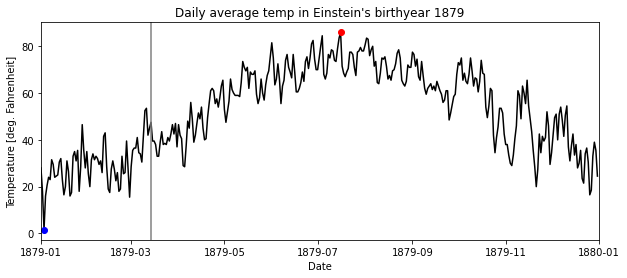

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 3</p>

In the last homework, you have also aggregated some data, for example the average temperature of every year. Why not plot that and see if we can find a trend (climate change) in there...

It would be cool to use __your__ yearly averages here. However, if you just want to work on the plot, you can use this code (very condensed with a list comprehension):

```python
years = np.arange('1870', '2020', dtype='datetime64[Y]')
# Within parenthesis, bracket or braces, you can split a code line:
years_tavg = np.array([
    np.mean(tavg[
        np.searchsorted(date, y) : 
        np.searchsorted(date, y+np.timedelta64(1,'Y'))
    ]) for y in years
])
```

It's fair to point out the y-axis values of course... but the trend is clear, isn't it?

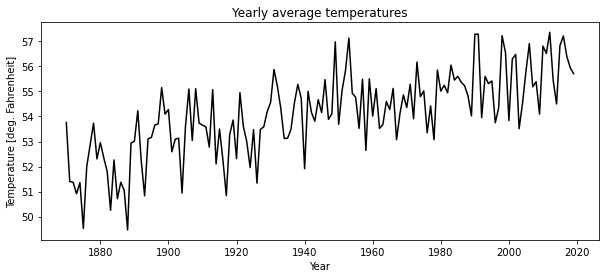

In [ ]:
# Feel free to use you own or uncomment this one:
# years = np.arange('1870', '2020', dtype='datetime64[Y]')
# years_tavg = np.array([
#     np.mean(tavg[
#         np.searchsorted(date, y) : 
#         np.searchsorted(date, y+np.timedelta64(1,'Y'))
#     ]) for y in years
# ])

<p style="background: limegreen; color: white; padding: 5px; font-size: 1.5em;">Bonus Task (optional)</p>

If there is a trend, and it looks fairly linear (experts might disagree, but let's not get into that), we can plot a linear regression curve, too.

There is a good explanation at the w3schools.com website, which I would recommend to take a look at:

https://www.w3schools.com/python/python_ml_linear_regression.asp

In short terms, you can use `scipy.stats.linregress(x, y)` to calculate everything you need (slope and intercept) and then just plot a straight line using `ax.plot()`.

__Note:__ The linregress function does not work well with `np.datetime64`. Use integers as x-values for the calculation (`np.arange(1870, 2020)` should do) and then plot with the `date` values again.

As an added bonus, you can use `ax.text()` to write the slope and $R^2$ in the figure.

The complete output might look like this:

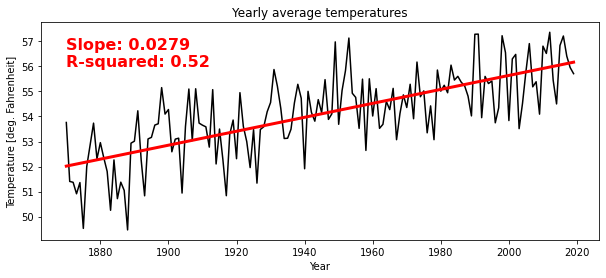

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 3b</p>

As we have seen, the average temperature has increased over the last 150 year.

How about the extreme temperatures (`tmax` on the hottest day each year, `tmin` on the coldest day)?

Of course, you need to create two more arrays like `years_tavg` above with the yearly extremes.

Now it's also time for a legend. The easiest way to create that is to assign a "label" to each element we plot, using the `label=` keyword argument. Then call `ax.legend()` (or `plt.legend()` if you're more into using the Pyplot functions):

```python
fig, ax = plt.subplots(figsize=(3,2))
ax.plot([1,3,2], label="A line")
ax.plot([2,0,1], 'o-r', label="Another line")
ax.label()
```

Produces:

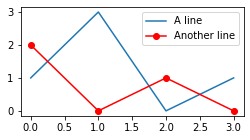

Your plot should look something like this:

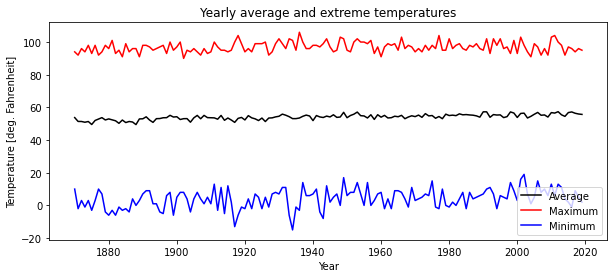

In [ ]:
# Again, if you want to create these arrays yourself, that's a great practice!
# years_tmax_max = np.array([
#     np.max(tmax[
#         np.searchsorted(date, y) : 
#         np.searchsorted(date, y+np.timedelta64(1,'Y'))
#     ]) for y in years
# ])
# years_tmin_min = np.array([
#     np.min(tmin[
#         np.searchsorted(date, y) : 
#         np.searchsorted(date, y+np.timedelta64(1,'Y'))
#     ]) for y in years
# ])

<p style="background: limegreen; color: white; padding: 5px; font-size: 1.5em;">Bonus Task (optional)</p>

Hunting down how a plot was created is sometimes a great way to understand figures in scientific papers - or find flaws in their analysis. Of course that is much easier when you have access to the raw data, which luckily more and more Journals enforce you to publish as well...

Here is an example of a figure that I created from our temperature data. Can you find out, how I did it?

__Some hints:__

*   Look at the numbers on the y-axis
*   `tmin` and `tmax` were involved
*   Whatever value was derived, the yearly averages are plotted here (like in task 3)

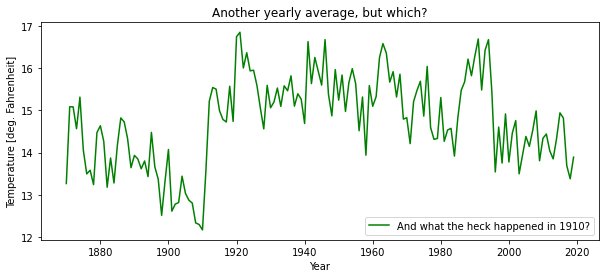

PS: If anyone has a clue, what happened in or after 1910, let me know. I'm really curious!

<p style="background: skyblue; color: white; padding: 5px; font-size: 1.5em;">It's up to you now!</p>

You can realize many more plots... It's really up to your fantasy:

*    Average temperatures for the months January and July across 150 years (in the same plot)
*    Average temperatures throughout the year (average Jan, average Feb, ...), with errorbars to indicate standard deviations
*    The same but with day-precision - "Mind the gap!" - how do you treat leap years?
*    ...

<p style="background: skyblue; color: white; padding: 5px; font-size: 1.5em;">&nbsp;</p>


# Histograms

Let's use a different style of plots... and precipitation.

How much does it rain per year? The first thing is to sum up all the precipitation for each year...

I've done this for you:

In [ ]:
# It's really just a variation of the same code... 
years = np.arange('1870', '2020', dtype='datetime64[Y]')
years_prcp = np.array([
    np.sum(prcp[
        np.searchsorted(date, y) : 
        np.searchsorted(date, y+np.timedelta64(1,'Y'))
    ]) for y in years
])
# And this is how we can calculate the days with precipitation,
# note the only difference is the `0 < ` added at the right place:
years_days_prcp = np.array([
    np.sum(0 < prcp[
        np.searchsorted(date, y) : 
        np.searchsorted(date, y+np.timedelta64(1,'Y'))
    ]) for y in years
])

Just an overview to get a feeling for the values:

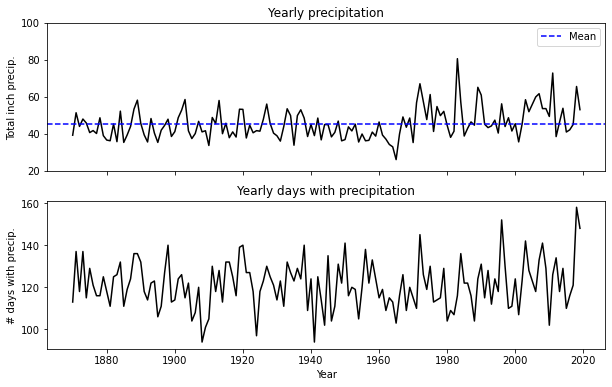

(you can create a similar plot yourself, but that's not the task)

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 4</p>

But let's show this as a histogram, so we can see the distribution the amount of precipitation.

Look at the line plot above to choose reasonable binsizes, use `np.min()` or `np.max()` if you want to make sure you have everything included.

With some styling, your histogram could look like this:

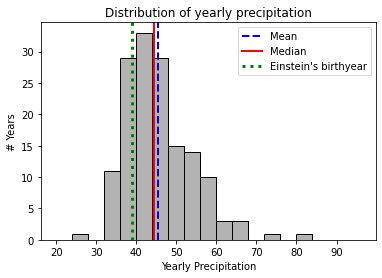

I've also taken the liberty to highlight Einstein's Birthyear... a rather dry one in New Yor. Where is yours?

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 4b</p>

It should be quick to create a similar plot with the yearly number of "rainy days".

How much do you have to change your code? _Copy&Paste to start with is totally allowed here!_

And if you do this, you have a plot like this in nearly no time:

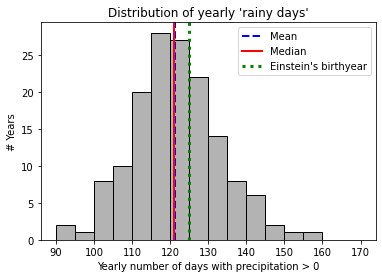

Funny thing... 1879 might have been rather dry, but there was still an above average number of rainy days.

# Scatter plots

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 5</p>

Now, I wonder how total precipitation and number of rainy days go together.

Nothing better than a scatterplot for this:

The number of rainy days on one axis and the amount of precipitation on the other.

With some minimal decoration, it looks like this:

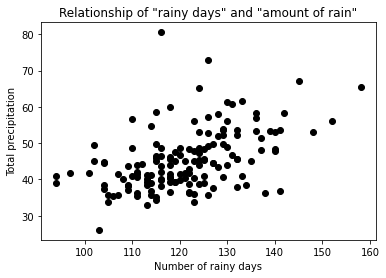

And if you want it more _stylish_ - how do you like this?

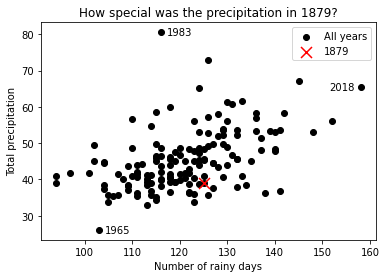

(Again, the second plot is not really a task, more like a suggestion. I used the `annotate()`-function for that, which you might want to learn about once you're familiar with the matplotlib basics)

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 5b</p>

Based on the previous plot (yeah, copy&paste encouraged again), let's add some information about the average temperature.

Take a look again at the live examples from day 5 ([download link](https://python.tyto.xyz/day5/Live-Examples-Plus.ipynb)) how to define individual colors for a scatter plot.

For this example, I used the colormap "plasma" (`cmap='plasma'`). And if you want to show a colorbar, the easiest way is like this:

```python
# save the output of the scatter()-function
h = ax.scatter(..., cmap='plasma')
# Pyplot creates a colorbar for you:
cb = plt.colorbar(h)
# And you can label it, too:
cb.set_label("Whatever values you're color-coding")
```


The entire figure should look like this:

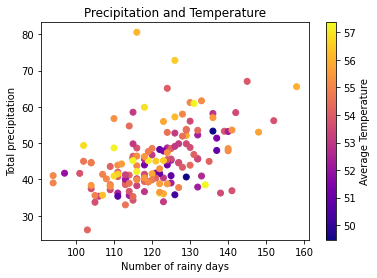

You're of course free to try out different combinations/variations.

Maybe you find something that looks less like confetti and more like a real trend/relationship in that data.

<p style="background: green; color: white; padding: 5px; font-size: 1.5em;">Task 6</p>

_Here comes a last and by far the most difficult task. We'll go step by step though. If you think it's too much, feel free to take a look at the solution for every step, read it carefully and maybe come back and try it then._

The idea is to visualize the temperature change over the course of a year (well, including all years) and also show where large amounts of precipitation are common.

__A picture is worth a thousand words__

This is how it could look like in the end...

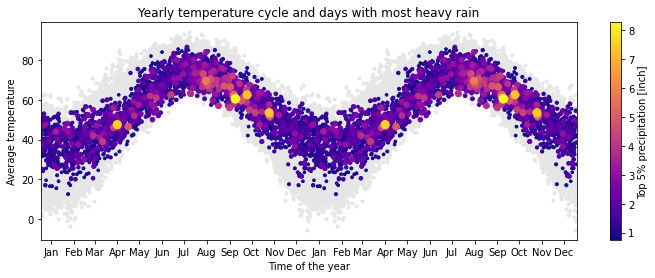

__Let's go step by step__

**Step 1)** We need to find a new x-axis that "wraps" all days into a single year.

The reasonable values here is: _the number of days since the beginning of each year_

For a single day, that would mean:

```python
bday = np.datetime64('1879-03-14')
# Reduce the precision to years:
byear = bday.astype('datetime64[Y]')
# The "year" is equal to January 1st (midnight), so we can subtract:
bday_diff = bday - byear
# Now, bday_diff's dtype is `timedelta[D]` which can be converted to `int`:
bday_in_year = bday_diff.astype(int)
# This gives us an index-like integer
# Jan 1st: 0; Jan 2nd: 1; ...
# ... Dec 31st: 364 (or 365 in a leap year)
print(f"{bday} is day {bday_in_year} of that year.")
```

Now put everything together in one line, without saving intermediate steps into variables. And then enjoy that NumPy can do most of its operations on arrays just as easy as on single values.

In the end, you should have a NumPy array like this, with the same size as `date`, `tavg` and the others. I called it `day_in_year`:

```python
array([ 0, 1, 2, ..., 362, 363, 364, 0, 1, 2, ..., 362, 363, 364])
#       ^ Jan 1st of 1870            ^ Jan 1st of 1871       ^ Dec 31st of 2019
# (the output will NOT look like this, but you might just plot the first 1000 values to check it)
```

To be fair, I ignored the leap year problem. There will be a 365 for every leap year and those "indexes" might be by a day off. You don't really see it in the plot anyway.

After this preparation, you can easily make a scatter plot like:

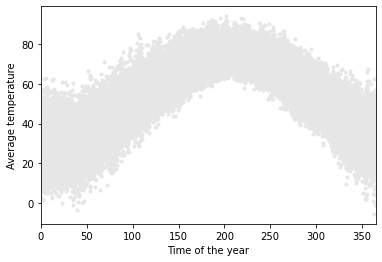

*   I have used `'0.9'` (a `str`, __not__ a `float`) as color
*   I have used `marker='.'`, because the defaul `o`-marker seemed to large for so many points

**Step 2)** Let's give this x-axis its meaning back

The idea is to take an arbitrary year (not a leap year) and calculate the "day in year" for the 15th of every month.

It would be cool when you can do that in code, but if not, here are the values for you (otherwise as a sanity check):

```python
months_mids = [14, 45, 73, 104, 134, 165, 195, 226, 257, 287, 318, 348]
```

And you get the names for free:

```python
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
```

Now use these two and define the xtick(location) and the labels, using `ax.xticks()` and `ax.xticklabels()`. 

And that already looks like a real thing:

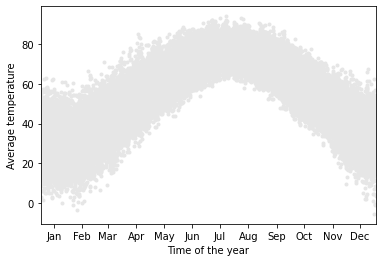

**Step 3)** Let's plot the rainy and non-rainy days in different colors, as an intermediate step

What we need is a boolean array indicating if a day is rainy or not. You have done that before.

Then you can simply use `scatter()` twice. You can use `~` as "not"-operator on boolean numpy arrays.

```python
# Non-rainy days first:
ax.scatter(_your_x_values_[~rainy], _your_y_values_[~rainy], color='0.9', marker='.')
# The rainy days on top:
ax.scatter(_your_x_values_[rainy], _your_y_values_[rainy], color='r', marker='.')
```

Looks like this:

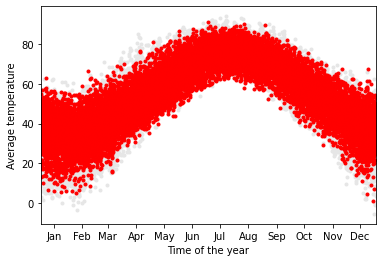

**Step 3b)** I think, those were too many days, `np.sum(rainy)` to be precise. Let's only take those with "a lot of rain".

Take a look at the documentation for `np.percentile()` ([Link](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html))

Change the definition of your `rainy` variable such that only those days in the "Top 5% of most rainy days" are included. That should be 2773 or 2722, depending on if you use `>=` or `>` for your comparison. Check what `np.sum(rainy)` returns.

This slightly "sparser" version now has only the most rainy days colored:

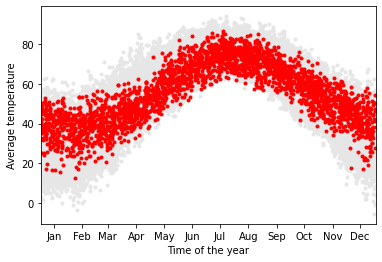

And we can already see: Days with heavy in summer months are relatively cold. During the winter, it's the opposite.

By the way, the "Top 5% most rainy days" are fairly equally distributed across the year (this figure is not a task, but you can make it one if you want):

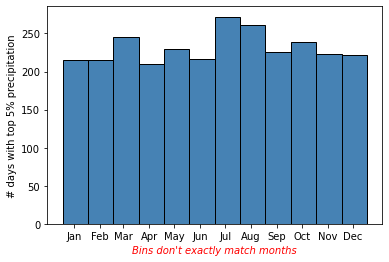

Back to our main topic...

**Step 4)** Color the most rainy days according to the amount it rained that day

In your `scatter()`-function with the rainy days, use an array to define the color of your dots. Do you remember how that was done? Keep the non-rainy days gray in the background.

I used the colormap `plasma` which ranges from black (lowest value) over red'ish colors to yellow. I like it here, because the top rainy days (the outliers so to say) pop out nicely... well maybe not yet, that will be the next (two) steps.

Also add a colorbar.

For now, our plot should look like this:

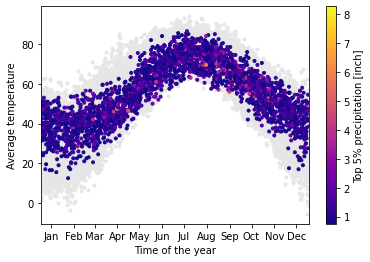

We're almost at the end. There are just some minor issues, that need to be addressed to make this plot _beautiful_.

The "top of the tops" are not really visible. That's because all dots are plotted in the order we handle them to the `scatter()`-function. And maybe we can use the option of different sizes to our advantage as well.

**Step 5a)** First let's get those "top" values to the front. This is something I wasn't sure how to do myself (not the only thing, to be honest), but I found a great solution online. Look at this quesion at Stack Overflow and the accepted (green checkmark) and in this case only answer:

https://stackoverflow.com/questions/55929374/give-a-individual-zorder-value-to-every-marker-in-a-matplotlib-scatter-plot

Bottomline, the answer lies in using `np.argsort()`. When the output of this function used is used as index for the array you gave it in the first place, you receive a sorted version of that array.

Now re-work your code. Create this `order` array and apply the index wherever necessary - this is probably more than just the array you `argsort`ed. Also, we already have the boolean array `rainy` which is the same length as all the other arrays. But `prcp[rainy]` is of course shorter. So you'll have to think about how to combine these two indexes. Here are some suggestions:

```python
# Based on:
order = np.argsort(prcp)
# this works - make sorted copies of all arrays you need (and then use them!):
prcp_sort = prcp[order]
rainy_sort = rainy[order]
ax.scatter( ..., prcp_sort[rainy_sort], ...)
# and this works, but is WRONG:
ax.scatter( ..., prcp[order][rainy], ...)
# and this works correctly:
ax.scatter( ..., prcp[order][rainy[order]], ...)
# and so does this (but it's almost unreadable):
ax.scatter( ..., prcp[rainy][order[rainy[order]]], ...)
# However, this FAILS (most likely, otherwise it's just wrong):
ax.scatter( ..., prcp[rainy][order], ...)
# While this is total BOGUS:
ax.scatter( ..., prcp[rainy,order], ...)
# There are certainly more... some of them might be correct
```

Alls this resorting brings the "yellow" dots to the front:

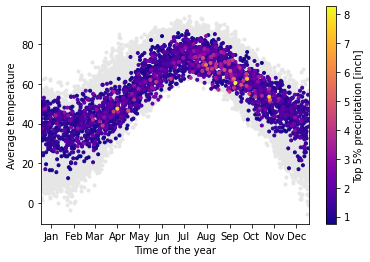

Now you can already see - if you look closely - that most of the "super heavy rainy days" were in autumn. That's what we expected, right?

__Step 5b)__ Highlight the "most heavy rainy days" even more by giving them a larger size, meanwhile downscaling less rainy days (within the top 5%)

This is now again a relatively simple step. Set the keyword-argument `s=` in the `scatter()`-function to the same values you used already for the colors (`c=`).

You will realize that all dots are very small then. Multiply the values by some constant factor - I used `36`, feel free to try with others.

It looks almost like the final figure is supposed to be:

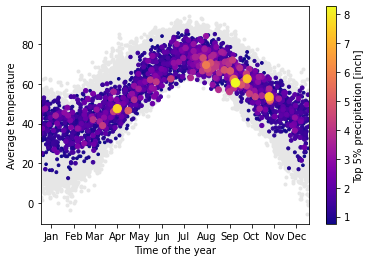

**Step 6)** The last step is to duplicate the plot, showing the data twice. The idea is that periodic data, like the "wrapped" years we have here, is often presented with two identical cycles. The advantage of that is, that effects at the "edges" of the plot are less likely to be overlooked. After all, there is no reason why December 31st should be all the way on the right and January 1st (one day "away" if you don't care about which year) is on the opposite end.

All you need to do:

1.  Increase the width of the figure. I used `figsize=(12, 4)`, the default is `(6,4)`.
2.  Execute your `scatter()`-functions twice, once as before and once with "shifted" x-values. Rembember, a year has (almost exactly for this purpose) 365 days. You only need one colorbar of course.
3.  You also have to update the ticks and tick labels on the x-axis.

And that's it. You have seen the final output at the beginning of this exercise.

__Congratulations: *You have scrolled all the way to the bottom*__

Seriously, if you have done all of this homework, you can be proud of yourself.

Think two weeks back when the course started, what you knew back then and what not.

Then scroll through this notebook and see how far you've come!